In [1]:
%matplotlib inline  
import pylab,numpy
import astropy,atpy
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
import pandas

from astropy.table import Table
#from astLib import astStats

In [2]:
filename='obs_info170130.txt'
obs = atpy.Table(filename,type='ascii')

In [3]:
date=filename[8:14]
obs.columns
obs['MOLECULE']
#plt.barh?

array(['HCN', 'HCN', 'HCN', ..., 'HCN', 'HCN', 'HCN'], 
      dtype='|S4')

In [4]:
#obs.colnames
#len(obs)

In [5]:
# 分别处理 HCN 和 HCO+
obs.hcn  = obs.where(obs['MOLECULE']=='HCN')
obs.hcop = obs.where(obs['MOLECULE']=='HCO+')

In [6]:
len(obs.hcn), len(obs.hcop)

(545, 567)

In [7]:
object = list(set(obs['OBJECT']))
object=sorted(object, reverse=True )
len(object)


22

In [8]:
# 原计划的观测时间
plan_time=numpy.array(
    [3., 4., 5., 5., 9.5, 8.5, 5., 5., 4.5, 8.,
     5., 8., 2., 6., 5.,  5., 8.5, 3.5,6.5, 7.,
     3., 8.5])

In [9]:
#plt.barh?

In [10]:
# 统计 HCN 和 HCO+ 的时间
#table = np.zeros((22,2))
hcn_object = object
hcn_time = np.zeros((6,len(hcn_object)))
hcop_object = object
hcop_time = np.zeros((6,len(hcop_object)))


# 为画图做准备， y 轴的值
y_pos = np.arange(len(object))
#np.tile(table, (22,1))
#hcop= np.array([['NGC0000',0.]])
#hcop = np.tile(table, (22,1))
len(object)

22

In [11]:
hcn_time.shape, hcop_time.shape
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [12]:
# HCN 的时间
for i in range(0,len(object)):
    inttime = 0
    band1=0; band2=0; band3=0; band4=0; band5=0
    for j in range(len(obs.hcn)):
        if obs.hcn['OBJECT'][j] == object[i]:
            inttime += obs.hcn['INT_TIME'][j]
            tau = 0.5*(obs.hcn['TAU225ST'][j]+obs.hcn['TAU225ST'][j])
            if tau<0.05:
                band1 += obs.hcn['INT_TIME'][j]
            if tau>=0.05 and tau<0.08:
                band2 += obs.hcn['INT_TIME'][j]
            if tau>=0.08 and tau<0.12:
                band3 += obs.hcn['INT_TIME'][j]
            if tau>=0.12 and tau<0.2:
                band4 += obs.hcn['INT_TIME'][j]
            if tau>=0.2:
                band5 += obs.hcn['INT_TIME'][j]
    hcn_time[0][i] = inttime
    hcn_time[1][i] = band1
    hcn_time[2][i] = band2
    hcn_time[3][i] = band3
    hcn_time[4][i] = band4
    hcn_time[5][i] = band5


In [13]:
# HCO+ 的时间
for i in range(0,len(object)):
    inttime = 0
    band1=0; band2=0; band3=0; band4=0; band5=0
    for j in range(len(obs.hcop)):
        if obs.hcop['OBJECT'][j] == object[i]:
            inttime += obs.hcop['INT_TIME'][j]
            tau = 0.5*(obs.hcop['TAU225ST'][j]+obs.hcop['TAU225ST'][j])
            if tau<0.05:
                band1 += obs.hcop['INT_TIME'][j]
            if tau>=0.05 and tau<0.08:
                band2 += obs.hcop['INT_TIME'][j]
            if tau>=0.08 and tau<0.12:
                band3 += obs.hcop['INT_TIME'][j]
            if tau>=0.12 and tau<0.2:
                band4 += obs.hcop['INT_TIME'][j]
            if tau>=0.2:
                band5 += obs.hcop['INT_TIME'][j]
    hcop_time[0][i] = inttime
    hcop_time[1][i] = band1
    hcop_time[2][i] = band2
    hcop_time[3][i] = band3
    hcop_time[4][i] = band4
    hcop_time[5][i] = band5

In [14]:
hcn_time = hcn_time/3600
hcop_time = hcop_time/3600
#hcn_time, hcop_time

In [15]:
sum(hcn_time[0]), sum(hcop_time[0])
#plt.barh?


(126.81174242424301, 119.37655393217794)

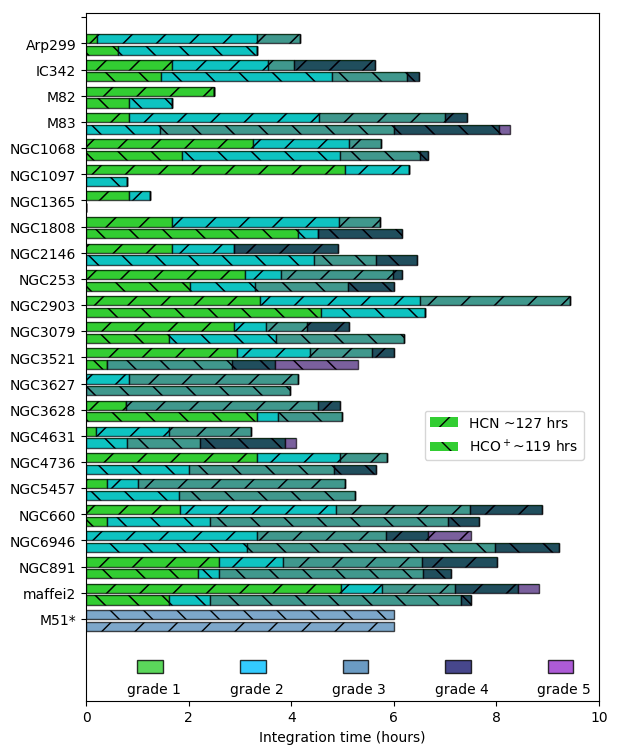

In [16]:
#df = pandas.DataFrame(dict(graph=object, hcn_time, hcop_time)) 

#color_list = plt.cm.Vega20c(np.linspace(0, 1, 20))
colorlist = ['limegreen', 'deepskyblue', 'steelblue', 'midnightblue', 'darkorchid']
fig=plt.figure(figsize=(6.18,8))
ax = plt.subplot(111)

width = 0.35

# -------------------------- HCN ----------------------
left = [0, hcn_time[1],hcn_time[1]+hcn_time[2], hcn_time[1]+hcn_time[2]+hcn_time[3],hcn_time[1]+hcn_time[2]+hcn_time[3]+hcn_time[4]]

plt.barh(y_pos, hcn_time[0], width, color=colorlist[0], align='center', alpha=1,
         hatch='/', label='HCN ~%i hrs' % round(sum(hcn_time[0])))
for i in range(5):
    plt.barh(y_pos, hcn_time[i+1],  width, left=left[i], 
             color=colorlist[i], align='center', alpha=0.7,
             ec='k', hatch='/',joinstyle='miter')

# -------------------------- HCO+ ----------------------
left =(0, hcop_time[1],hcop_time[1]+hcop_time[2], hcop_time[1]+hcop_time[2]+hcop_time[3],hcop_time[1]+hcop_time[2]+hcop_time[3]+hcop_time[4]) 
plt.barh(y_pos-width-0.1, hcop_time[0], width, color=colorlist[0], 
         align='center', alpha=1, hatch='\\', label=r'HCO$^+$~%i hrs' % round(sum(hcop_time[0])))
for i in range(5):
    plt.barh(y_pos-width-0.1, hcop_time[i+1], width, left=left[i], 
             color=colorlist[i], align='center', alpha=0.7, 
             ec='k', hatch='\\')

#------------------- M51 ------------------
plt.barh(-1.45, 6, width, color=colorlist[2], align='center', alpha=0.7, 
             ec='k', hatch='/')
plt.barh(-1, 6, width, color=colorlist[2], align='center', alpha=0.7, 
             ec='k', hatch='\\')
plt.yticks([23], ['M51'])



# predicted total time
#plt.barh(y_pos-0.5*width-0.05, plan_time, 0.1, color='crimson', align='center',
#       alpha=0.99, hatch='', label=r'predict:~%i hrs' % round(2*sum(plan_time)))


# weather band legend 
weather_loc_x=[1,3,5,7,9]
weather_loc_y=[-4,-4,-4,-4,-4]
weather_name = ['grade 1','grade 2','grade 3','grade 4','grade 5']
for i in range(5):
    plt.barh(-3, 0.5,  0.5, left=weather_loc_x[i],
             color=colorlist[i], align='center', ec='k', hatch='', alpha=0.8)
    plt.text(weather_loc_x[i]-0.2,weather_loc_y[i],weather_name[i])
    
object.insert(0, 'M51*')
#y_pos2 = [y_pos, 23]
y_pos = np.arange(len(object)+1)
plt.yticks(y_pos-0.5*width-1, object )
plt.ylim([2*width - 5, len(object)-1])
plt.xlim([0, 10])
plt.xlabel('Integration time (hours)')
#plt.title('Integration time by HARP')
plt.legend(loc=(0.66,0.35))
plt.subplots_adjust(left=0.14)
plt.subplots_adjust(bottom=0.11)
plt.subplots_adjust(right=0.97)
plt.subplots_adjust(top=0.97)
#plt.text(8,21.5, 'as of: '+filename[8:14], color = 'crimson')
#plt.text(-0.2,14.65, 'X', color = 'red')
#plt.text(-0.2,15.65, 'X', color = 'red')

plt.show()


In [17]:
fig.savefig('int_time'+date+'_32.png')